In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('recons-our-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAAGTCGGAGGAGCAAGCGCG...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGAGCGCCATTTTGTTAC...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 10000/10000 [00:00<00:00, 222612.24it/s]


[11, 41, 49, 52, 59, 66, 81, 90, 93, 102, 116, 130, 133, 151, 165, 173, 188, 196, 190, 221, 249, 259, 281, 277, 314, 338, 333, 352, 359, 391, 398, 400, 405, 450, 454, 496, 482, 510, 537, 556, 574, 571, 598, 605, 640, 647, 652, 698, 696, 725, 754, 755, 765, 813, 807, 1466, 1430, 1431, 1403, 1394, 1380, 1371, 1360, 1340, 1335, 1310, 1254, 1302, 1277, 1247, 1259, 1203, 1199, 1186, 1197, 1173, 1127, 1123, 1141, 1092, 1117, 1077, 1074, 1058, 1041, 1028, 996, 995, 1005, 952, 964, 944, 946, 920, 916, 912, 896, 876, 879, 838, 833, 853, 895, 837, 821, 840, 863, 852, 782, 570, 0]


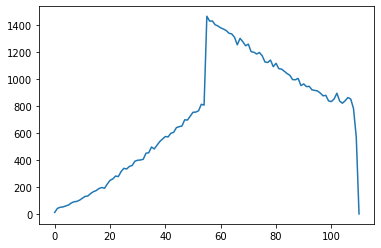

In [10]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [11]:
import numpy as np


In [ ]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

In [12]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

NameError: name 'pairs_no_pos' is not defined

In [ ]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> AG 6
A -> T 8
A -> C 9
C -> T 9
G -> T 11
G -> A 11
C -> G 11
C -> A 13
A -> G 14
T -> G 14
T -> C 17
T -> A 19
G -> C 22
G ->  92
C ->  100
A ->  105
T ->  108
 -> T 995
 -> G 1023
 -> C 1046
 -> A 1167


In [ ]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [ ]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


 -> T @ 80 6
 -> A @ 67 6
 -> G @ 71 6
 -> A @ 30 6
 -> C @ 72 6
 -> T @ 109 6
 -> T @ 5 6
 -> T @ 49 6
 -> C @ 32 6
 -> C @ 92 6
 -> G @ 43 6
 -> A @ 3 6
 -> A @ 53 6
 -> T @ 38 6
 -> C @ 80 6
 -> C @ 70 6
 -> C @ 87 6
 -> T @ 32 6
 -> G @ 82 6
 -> T @ 41 6
 -> T @ 103 6
 -> T @ 54 6
 -> G @ 64 6
 -> T @ 69 6
 -> T @ 88 6
 -> T @ 67 6
 -> A @ 97 6
 -> C @ 1 6
 -> G @ 96 6
 -> A @ 108 6
 -> A @ 16 6
 -> A @ 104 6
 -> C @ 54 6
 -> G @ 36 6
 -> G @ 11 6
 -> T @ 84 6
 -> T @ 78 6
 -> G @ 95 6
 -> G @ 40 7
 -> C @ 14 7
 -> A @ 95 7
 -> G @ 69 7
 -> G @ 84 7
 -> A @ 57 7
 -> C @ 77 7
 -> T @ 16 7
 -> G @ 56 7
 -> C @ 10 7
 -> G @ 62 7
 -> A @ 83 7
 -> G @ 65 7
 -> A @ 84 7
 -> C @ 100 7
 -> C @ 84 7
 -> C @ 79 7
 -> C @ 53 7
 -> A @ 100 7
 -> C @ 44 7
 -> T @ 85 7
 -> T @ 83 7
 -> T @ 71 7
 -> T @ 70 7
 -> T @ 7 7
 -> A @ 20 7
 -> G @ 107 7
 -> T @ 6 7
 -> T @ 58 7
 -> T @ 56 7
 -> T @ 52 7
 -> T @ 51 7
 -> A @ 28 7
 -> T @ 40 7
 -> G @ 2 7
 -> G @ 15 7
 -> G @ 16 7
 -> C @ 20 7
 -> G @ 25 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[23, 29, 50, 50, 42, 43, 44, 47, 41, 45, 43, 33, 42, 42, 32, 50, 37, 50, 44, 57, 36, 55, 49, 45, 47, 34, 36, 43, 39, 47, 48, 42, 42, 44, 43, 47, 49, 48, 54, 52, 36, 45, 45, 39, 50, 48, 42, 43, 40, 55, 58, 50, 48, 39, 30, 10, 35, 37, 39, 44, 46, 53, 44, 53, 39, 42, 41, 36, 64, 41, 44, 40, 55, 43, 51, 44, 43, 51, 55, 53, 37, 53, 45, 39, 36, 42, 57, 53, 44, 36, 47, 45, 45, 57, 40, 32, 37, 35, 61, 59, 49, 49, 46, 44, 45, 59, 39, 40, 33, 25, 6]


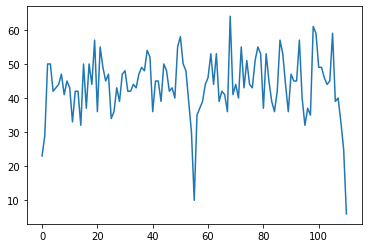

In [ ]:
plt.plot(range(strand_len + 1), pos_counts)

In [ ]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[8, 5, 15, 13, 10, 6, 7, 7, 10, 14, 11, 3, 9, 10, 8, 8, 7, 11, 8, 11, 9, 14, 13, 8, 9, 11, 5, 9, 5, 5, 8, 9, 6, 8, 11, 13, 11, 9, 6, 5, 7, 6, 8, 10, 10, 12, 9, 10, 13, 6, 9, 7, 7, 13, 6, 2, 7, 10, 7, 8, 12, 12, 10, 11, 9, 11, 11, 6, 17, 6, 7, 7, 8, 5, 11, 4, 9, 11, 6, 18, 6, 12, 13, 7, 6, 7, 10, 10, 6, 10, 12, 9, 13, 14, 8, 8, 10, 9, 10, 14, 14, 12, 8, 6, 11, 10, 13, 4, 4, 6, 0]


In [ ]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


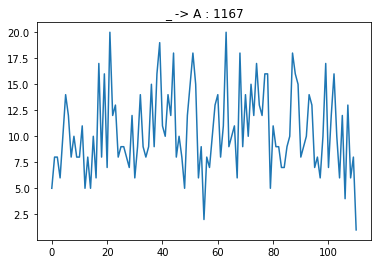

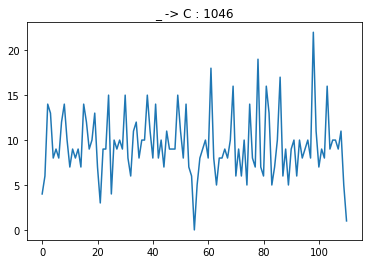

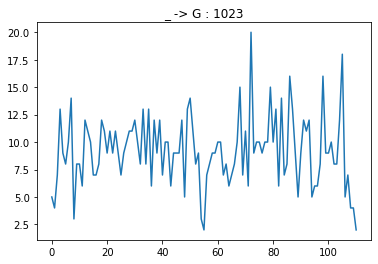

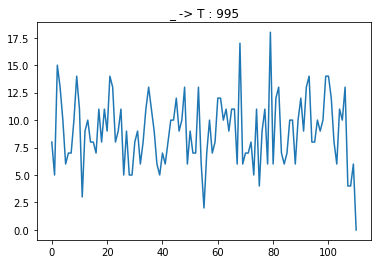

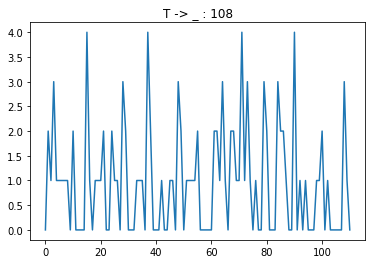

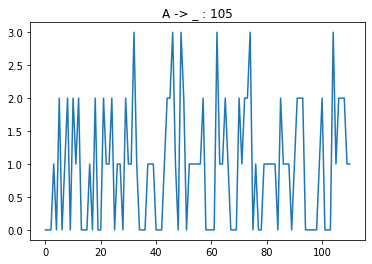

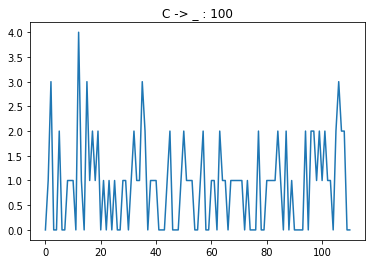

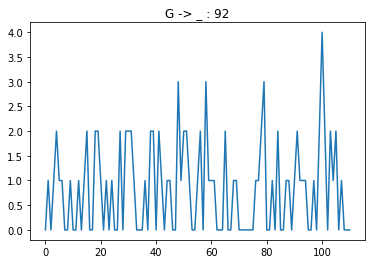

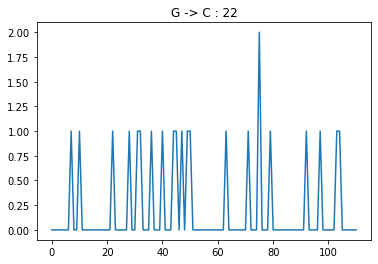

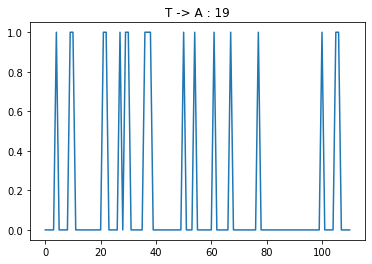

In [ ]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [ ]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)